## Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import load_model
from lime import lime_image
from keras.initializers import glorot_uniform
from skimage.segmentation import mark_boundaries
from keras.optimizers import Adam
from numpy import asarray
from numpy import save
from numpy import load

C:\Users\DespoinaK\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DespoinaK\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DespoinaK\Miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DespoinaK\Miniconda3\envs\tensorfl

## Loading pictures

In [2]:
# Load Train Data (samples and predictions)
X_train = load('X_train.npy')
y_train = load('y_train.npy')

# Load Test Data (samples and predictions)
X_test = load('X_test.npy')
y_test = load('y_test.npy')

# Shuffle Train data in order to show samples from both categories -'Malignant' & 'Benign'
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

# Shuffle Test data in order to show samples from both categories -'Malignant' & 'Benign'
#s = np.arange(X_test.shape[0])
# Not use np.arrange, we use specific suffling pattern in order to show same samples every time we run this code
s = [264, 441, 225,  96, 454, 127, 626, 229, 531, 368, 107, 150, 129,
       623, 658,  37, 645, 162, 302, 572, 388, 434, 238, 621, 591, 588,
       307, 227, 207, 492,  40,  79, 647, 443, 520, 342, 638, 161, 506,
       513,   2,  64, 131, 223, 545, 159, 646, 518, 126, 484, 211, 639,
       630, 619, 293, 558, 113, 340, 251, 641, 244, 411, 259, 109, 600,
       395, 526,  65,  10, 363,  46, 456, 589, 222, 483, 565, 616, 537,
       299, 172, 290, 567, 215,  36, 374, 189, 194, 247, 353,  35, 272,
       541, 352, 330,  26, 178, 314, 505, 568, 241, 557, 121, 203, 326,
        14, 401, 283, 196, 120,  99, 143, 279, 301, 569, 332,   1, 157,
       446,  94,  72, 637, 117, 265, 442, 268, 414, 577, 394, 298, 284,
        85, 476, 137, 448, 364, 333, 110, 547, 242, 611, 168, 582,  42,
         5,  20, 554, 246,  28, 583, 197,  55, 474, 610, 590, 544,  24,
       539, 331, 103, 181, 250,   6, 380, 525, 529, 276,  71, 440, 258,
       491, 147, 460, 477, 417,  75, 452, 347, 579, 320, 423,  30, 536,
       578,  57, 438, 650, 212, 465, 627, 424,  23, 532,  25, 145, 587,
        31, 167, 386, 425, 457, 604, 158, 114, 285, 318, 101, 266, 124,
        90, 319, 482, 361, 618, 369, 179, 656,  82, 149, 334, 184, 534,
       323,  56, 459, 313, 291,  66,   7, 210,  12, 376, 208,  89, 404,
       586, 146, 397, 488, 516, 173, 471,   3,  74,  61, 153, 325, 585,
       350, 470, 514, 233, 163, 466, 300, 312,   8, 407, 433, 175, 390,
       573,  78, 555, 379, 602, 310, 260, 599, 297, 601,  39, 384, 400,
       561, 160, 328, 463, 231, 468, 367, 200, 605, 385, 180, 278, 415,
       391, 154, 408, 530, 617, 593, 634,  84, 206, 643, 321, 524,  34,
       576, 192,  54,  17, 295, 156, 270, 305, 552,  88, 575, 652, 254,
       533, 358, 322, 511, 336, 405, 191, 182, 409, 115, 607, 420, 119,
       327, 564, 651, 190, 515, 648, 100, 263, 339, 195, 449, 548, 174,
       455, 393, 133, 261, 108,  50, 205, 105,  18, 519, 392,  87, 228,
       201, 603, 346,  67, 237, 341,  59, 428, 286,  62, 657, 253, 257,
       430, 528, 142, 304, 655, 509, 102, 183, 292, 381, 527, 436, 419,
       224, 372, 507,  69, 560, 199,  93, 202, 597, 478, 633, 606, 366,
        53, 631, 239, 495, 635, 329, 243, 155, 216, 343, 377, 249, 508,
       116,  32, 375, 218,  47, 122, 614, 493,  29, 418, 632, 629, 177,
       402, 355, 553, 538,  58, 274,  13, 118, 562, 144, 396, 134,  49,
       128, 450, 349, 316, 351, 365, 574,  68, 625, 654,  43, 220, 636,
       356, 620, 540, 570, 287, 551, 640, 217, 221,  44,  95,  19, 464,
       275, 512, 422, 453, 303,  92, 151, 462, 504, 399, 296, 123, 338,
        60, 308, 213, 592, 413, 198, 406, 309, 360, 234, 451,  45,   0,
        27, 439,  48, 412, 348,  11, 432, 277,  98, 214, 288, 371, 169,
       649, 522, 486, 571,  97, 171, 487, 475, 132, 226, 387, 219, 445,
       517, 426, 382, 479,  15, 389, 584, 186, 248,  38, 281,  73, 273,
       236,  51, 615, 267, 125, 130, 152, 435, 378, 458,  70, 581, 138,
       187, 362,  83, 311, 271, 337, 609, 140, 344, 523, 354, 188, 280,
       500, 467, 185, 644,  52,  81, 193, 543, 252, 502, 345, 497, 112,
       139,  33, 324, 240, 653, 164, 235,  22, 437, 383, 306, 499, 473,
       622, 335, 135, 255, 106, 542, 245, 209, 490, 370, 556, 262, 410,
       269,  86, 104, 521, 612, 444, 416, 535, 510, 642, 469,  91, 480,
        41, 431, 628, 503, 596, 461, 373, 613, 559,  80, 496, 232, 398,
       204, 485, 563, 608,  63, 403, 111, 359, 546, 481, 447, 357, 501,
       494, 498, 282, 598, 256,  21, 141, 294, 580,  76,   9, 429, 427,
       659,  77, 594, 170, 165, 489, 289, 317, 176, 624,  16, 315, 550,
       421,   4, 136, 148, 230, 566, 472, 595, 166, 549]
#np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

In [3]:
# Get only the first 50 samples (to avoid out-of-memory issues) from Train data
X_train = X_train[0:50]
y_train = y_train[0:50]

# Get only the first 50 samples (to avoid out-of-memory issues) from Test data
X_test = X_test[0:50]
y_test = y_test[0:50]

## Load ResNet50 CNN Model

In [4]:
# Load the ResNet50 NN model
model_path = 'C:\\Users\\DespoinaK\\Desktop\\skinCancer\\models\\resnet50.h5'
model_json = 'C:\\Users\\DespoinaK\\Desktop\\skinCancer\\models\\resnet50.json'

json_file = open(model_json, 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(model_path)

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


## Test Dataset > Show the first 15 images

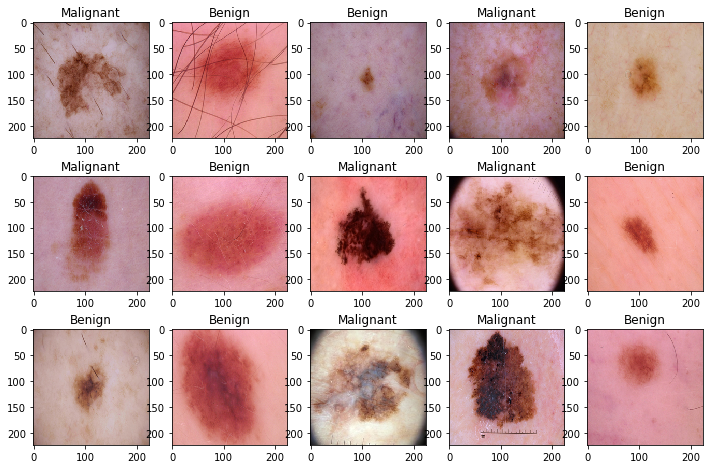

In [5]:
# Display first 15 images of moles, and how they are classified from TEST DATASET
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_test[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_test[i], interpolation='nearest')
    
    
plt.show()

### Sample 1: Benign Mole

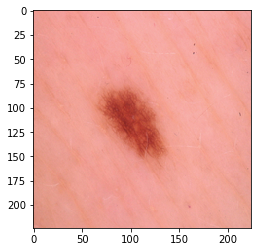

In [6]:
sample1 = plt.imshow(X_test[10])
actual_pred_sample1 = y_test[10]

### Sample 2: Malignant Mole

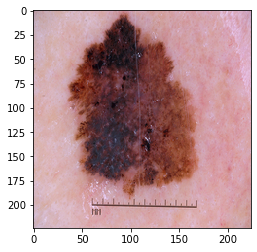

In [7]:
sample2 = plt.imshow(X_test[14])
actual_pred_sample2 = y_test[14]

## Categorical Labels

### Turn labels into one hot encoding

In [8]:
y_train = to_categorical(y_train, num_classes= 2)
y_test = to_categorical(y_test, num_classes= 2)

## Normalization

### Normalize all Values of the pictures by dividing all the RGB values by 255

In [9]:
# With data augmentation to prevent overfitting 
X_train = X_train/255.
X_test = X_test/255.

# ResNet50 predictions for two previous samples

In [10]:
class_names = ['Benign', 'Malignant']

## Sample 1: ResNet50 prediction = "Benign"

In [11]:
# Convert the image / images into batch format 
image_batch = np.expand_dims(X_test[i], axis = 0) 

y_i_pred = loaded_model.predict(image_batch)  
print(y_i_pred)
y_i_pred_label = class_names[np.argmax(y_i_pred)]
print(y_i_pred_label)

[[9.9980122e-01 1.9883229e-04]]
Benign


In [12]:
# Create LIME Image Explainer
explainer = lime_image.LimeImageExplainer()

In [13]:
# Explain Sample 1 with LIME
explanation_sample1 = explainer.explain_instance(X_test[i],loaded_model.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
# Sample 1 Label Assigned by ResNet50 -> Benign = 0
y_i_pred_label

'Benign'

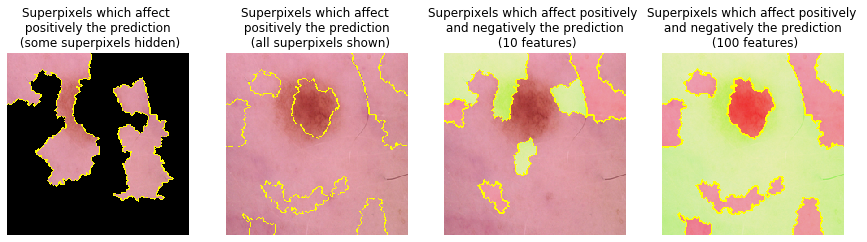

In [32]:
# Show Explanation Plots for Sample 1

# (1) Show explanation only with superpixels which affect positively the prediction (some superpixels hidden)
temp1, mask1 = explanation_sample1.get_image_and_mask(0,positive_only=True, hide_rest=True, num_features = 10)

# (2) Show explanation only with superpixels which affect positively the prediction (all superpixels shown)
temp2, mask2 = explanation_sample1.get_image_and_mask(0,positive_only=True, hide_rest=False, num_features = 100)

# (3) Show explanation only with superpixels which affect positively and negatively the prediction (10 features)
temp3, mask3 = explanation_sample1.get_image_and_mask(0,positive_only=False, hide_rest=False, num_features = 10)

# (4) Show explanation only with superpixels which affect positively and negatively the prediction (100 features)
temp4, mask4 = explanation_sample1.get_image_and_mask(0,positive_only=False, hide_rest=False, num_features=100)

# Create sublots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,15))

# Show the sublot (1) 
ax1.imshow(mark_boundaries(temp1, mask1))
ax1.axis('off')
ax1.title.set_text('Superpixels which affect \n positively the prediction \n (some superpixels hidden)')

# Show the sublot (2)
ax2.imshow(mark_boundaries(temp2, mask2))
ax2.axis('off')
ax2.title.set_text('Superpixels which affect \n positively the prediction \n  (all superpixels shown)')

# Show the sublot (3)
ax3.imshow(mark_boundaries(temp3, mask3))
ax3.axis('off')
ax3.title.set_text('Superpixels which affect positively \n and negatively the prediction \n (10 features)')

# Show the sublot (4)
ax4.imshow(mark_boundaries(temp4, mask4))
ax4.axis('off')
ax4.title.set_text('Superpixels which affect positively \n and negatively the prediction \n (100 features)')

In [ ]:
loaded_model.predict(image_batch).argmax(axis=1)[0]

## Sample 2: ResNet50 prediction = "Malignant"

In [36]:
# Convert the image / images into batch format 
image_batchk = np.expand_dims(X_test[14], axis = 0) 

#print('X_test[k].shape', end = " ")
#print(X_test[k].shape)

#print('image_batch.shape', end = " ")
#print(image_batchk.shape)

y_k_pred = loaded_model.predict(image_batchk)  
print(y_k_pred)
y_k_pred_label = class_names[np.argmax(y_k_pred)]
print(y_k_pred_label)

[[0.02926768 0.9707324 ]]
Malignant


In [37]:
# Explain Sample 2 with LIME
explanation2 = explainer.explain_instance(X_test[14],loaded_model.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [44]:
# Sample 2 Label Assigned by ResNet50 -> Malignant = 1
y_k_pred_label

'Malignant'

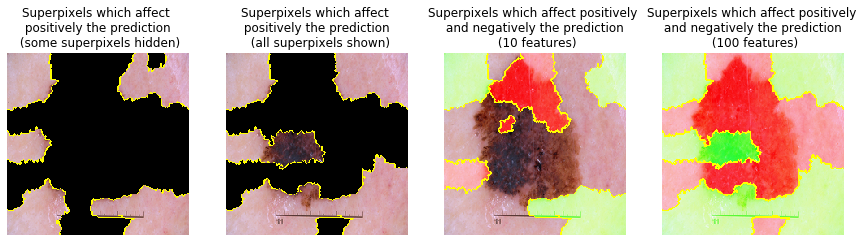

In [54]:
# Show Explanation Plots for Sample 2

# (1) Show explanation only with superpixels which affect positively the prediction (some superpixels hidden)
temp1_1, mask1_1 = explanation2.get_image_and_mask(1,positive_only=True, hide_rest=True, num_features = 10)

# (2) Show explanation only with superpixels which affect positively the prediction (all superpixels shown)
temp2_2, mask2_2 = explanation2.get_image_and_mask(1,positive_only=True, hide_rest=True, num_features = 100)

# (3) Show explanation only with superpixels which affect positively and negatively the prediction (10 features)
temp3_3, mask3_3 = explanation2.get_image_and_mask(1,positive_only=False, hide_rest=False, num_features = 10)

# (4) Show explanation only with superpixels which affect positively and negatively the prediction (100 features)
temp4_4, mask4_4 = explanation2.get_image_and_mask(1,positive_only=False, hide_rest=False, num_features=100)

# Create sublots
fig, (ax1_1, ax2_2, ax3_3, ax4_4) = plt.subplots(1, 4, figsize=(15,15))

# Show the sublot (1) 
ax1_1.imshow(mark_boundaries(temp1_1, mask1_1))
ax1_1.axis('off')
ax1_1.title.set_text('Superpixels which affect \n positively the prediction \n (some superpixels hidden)')

# Show the sublot (2) 
ax2_2.imshow(mark_boundaries(temp2_2, mask2_2))
ax2_2.axis('off')
ax2_2.title.set_text('Superpixels which affect \n positively the prediction \n  (all superpixels shown)')

# Show the sublot (3) 
ax3_3.imshow(mark_boundaries(temp3_3, mask3_3))
ax3_3.axis('off')
ax3_3.title.set_text('Superpixels which affect positively \n and negatively the prediction \n (10 features)')

# Show the sublot (4) 
ax4_4.imshow(mark_boundaries(temp4_4, mask4_4))
ax4_4.axis('off')
ax4_4.title.set_text('Superpixels which affect positively \n and negatively the prediction \n (100 features)')